<a href="https://colab.research.google.com/github/omajipawar/Telecom-Churn-Analysis/blob/main/Telecom_Churn_Analysis_(Omaji_Pawar)_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Orange S.A., formerly France Télécom S.A., is a French multinational telecommunications corporation. The Orange Telecom's Churn Dataset, consists of cleaned customer activity data (features), along with a churn label specifying whether a customer canceled the subscription.

## <b> Explore and analyze the data to discover key factors responsible for customer churn and come up with ways/recommendations to ensure customer retention. </b>

## Telecom Churn Analysis
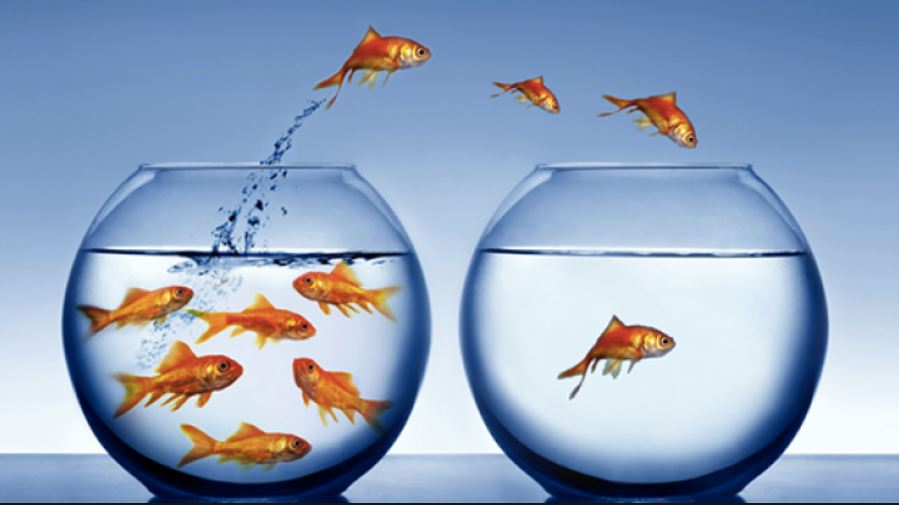

In [1]:
#Importing some important Python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Mounting drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Working directory path
file_path = '/content/drive/MyDrive/csv files/Telecom Churn.csv'

##Reading and Exploring the data

In [4]:
#Reading data
df = pd.read_csv(file_path)

In [5]:
#Observing first five rows
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [6]:
#Observing last five rows
df.tail()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
3328,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,Yes,No,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False
3332,TN,74,415,No,Yes,25,234.4,113,39.85,265.9,82,22.60,241.4,77,10.86,13.7,4,3.70,0,False


In [7]:
#basic info of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [8]:
#Shape of dataset
df.shape

(3333, 20)

In [9]:
#Descriptive summary of data
df.describe(include='all')

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
count,3333,3333.000000,3333.000000,3333,3333,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333
unique,51,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,WV,NaN,NaN,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
freq,106,NaN,NaN,3010,2411,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2850
mean,NaN,101.064806,437.182418,NaN,NaN,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856,NaN
std,NaN,39.822106,42.371290,NaN,NaN,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491,NaN
min,NaN,1.000000,408.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,74.000000,408.000000,NaN,NaN,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,NaN
50%,NaN,101.000000,415.000000,NaN,NaN,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000,NaN
75%,NaN,127.000000,510.000000,NaN,NaN,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000,NaN


### Outliers

Box plots help visualize the distribution of quantitative values in a field. They are also useful for identifying outliers.

When reviewing a box plot, an outlier is defined as a data point that is located outside the whiskers of the box plot.

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17]),
 <a list of 17 Text major ticklabel objects>)

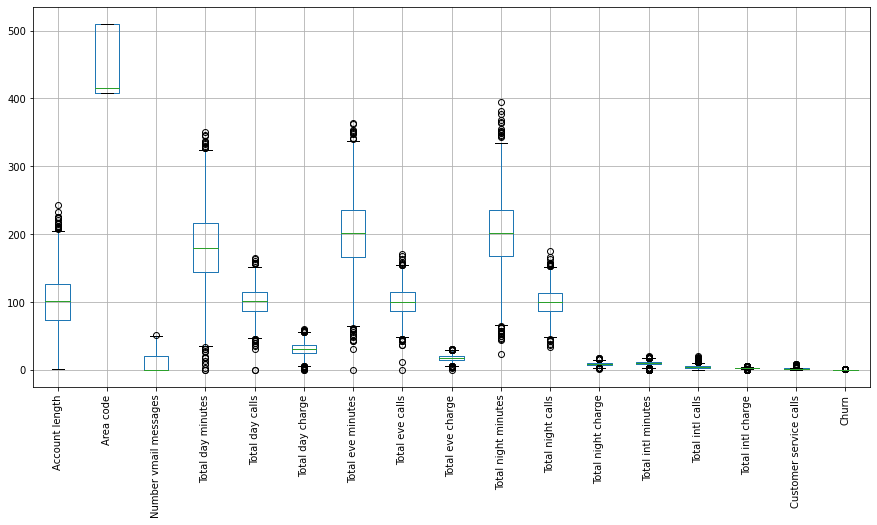

In [10]:
#Plotting boxplot
plt.figure(figsize=(15,7))
df.boxplot()
plt.xticks(rotation=90)

As we can see in the boxplot, in each of the columns outliers are present.

### Looking for and handling NaN / Null / Missing values

In [11]:
#Null values present in each column 
df.isnull().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

There is no any null value present in the dataset.

### Trying to get some conclusion from data, correlation and trends.

Let's how the numeric features are distributed with the help of distplot.

In [12]:
#numeric feature list
numeric_features = df.describe().columns.tolist()
numeric_features

['Account length',
 'Area code',
 'Number vmail messages',
 'Total day minutes',
 'Total day calls',
 'Total day charge',
 'Total eve minutes',
 'Total eve calls',
 'Total eve charge',
 'Total night minutes',
 'Total night calls',
 'Total night charge',
 'Total intl minutes',
 'Total intl calls',
 'Total intl charge',
 'Customer service calls']

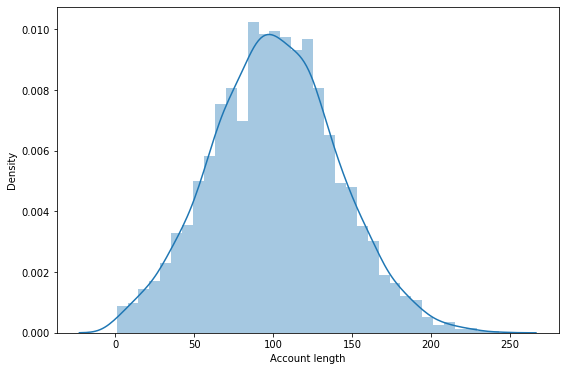

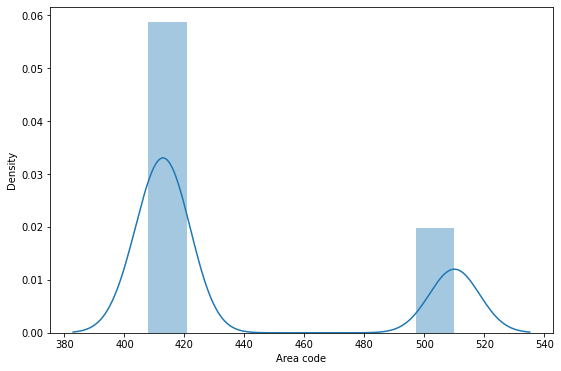

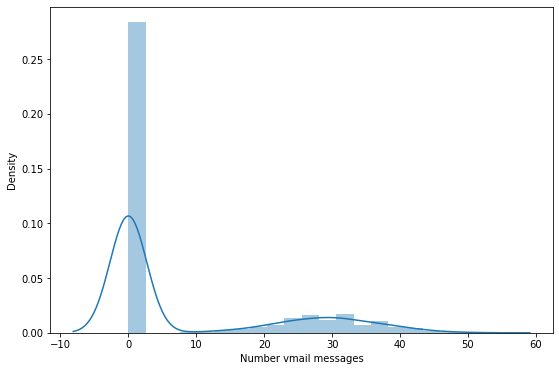

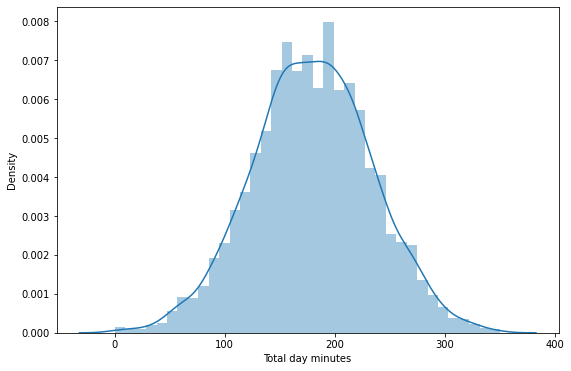

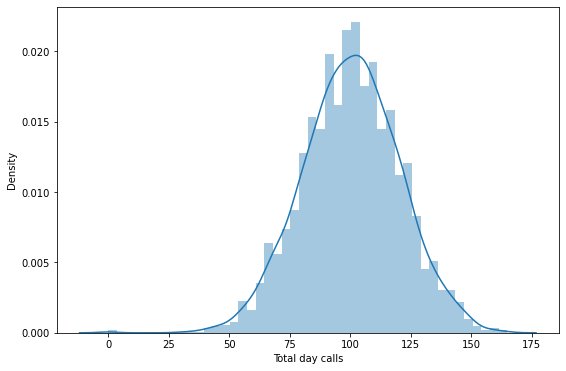

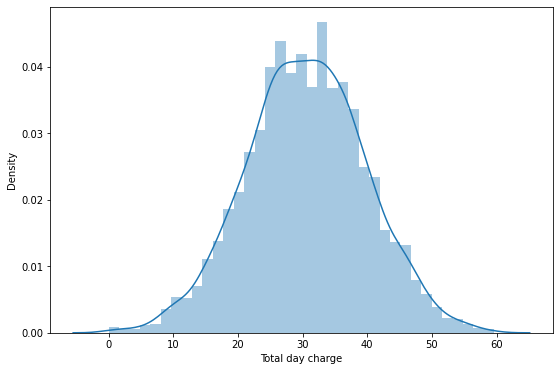

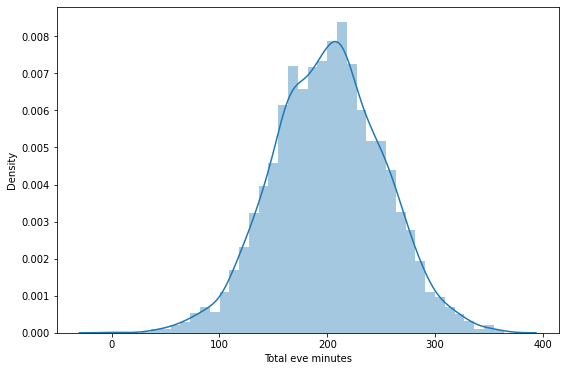

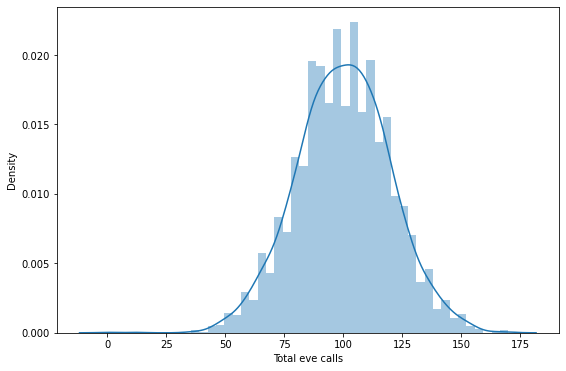

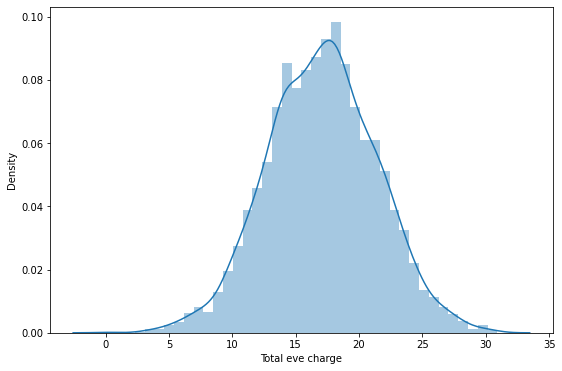

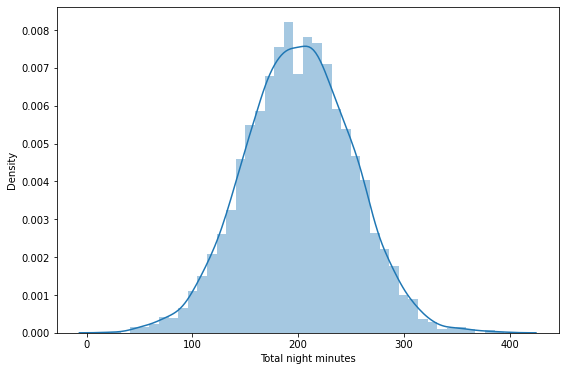

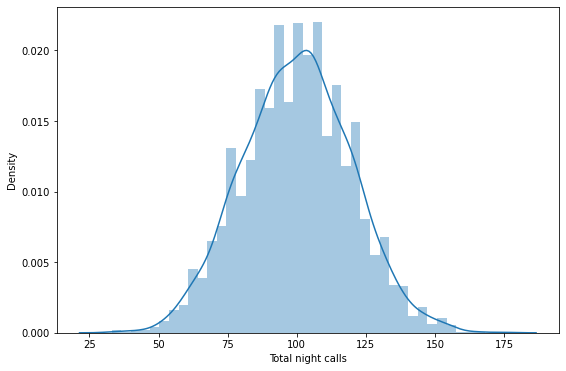

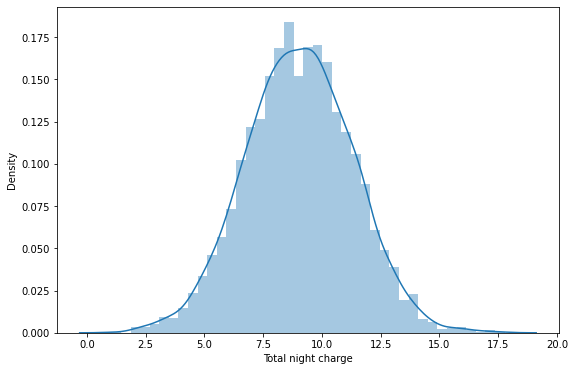

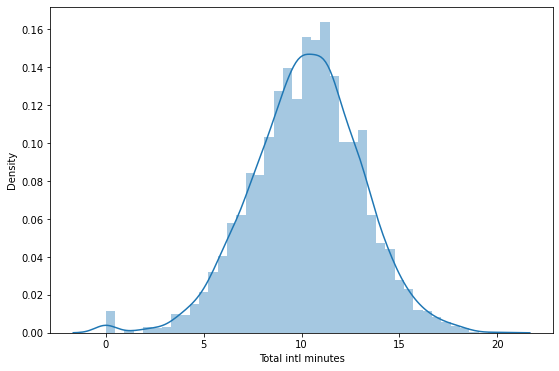

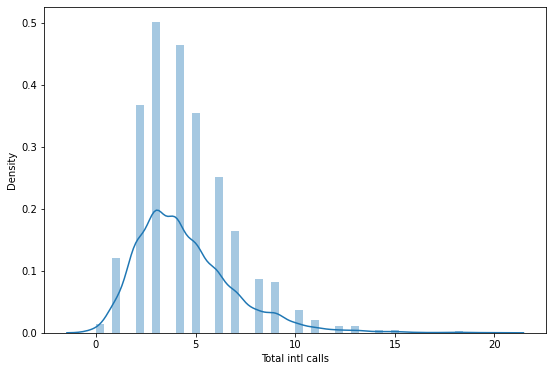

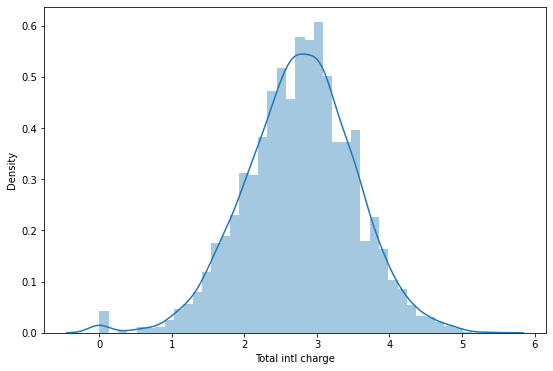

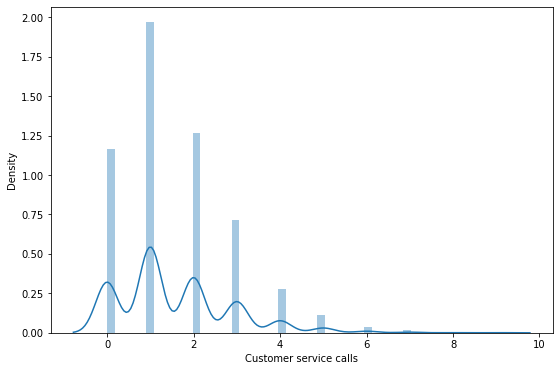

In [13]:
#plotting distplot of all numeric features
for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    sns.distplot(df[col],hist=True)

Most of the variables of dataset are normally distributed.

### Churn Distribution

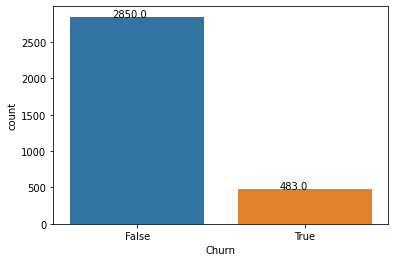

In [14]:
#Countplot of Churn 
ax = sns.countplot(x='Churn',data=df)
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.show()

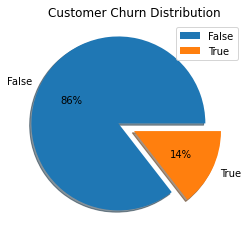

In [15]:
#plotting a piechart showing the percentage of Churn customers and non-churned customers.
plt.pie(df['Churn'].value_counts(),labels=['False','True'],explode=[0.2,0],shadow=True,autopct='%1.0f%%')
plt.legend()
plt.title('Customer Churn Distribution')
plt.show()

'Churn' column has two categories which include True and False values. (True = Customer will move or churn out, False = Customer won’t move).



*   We can clearly see that our data is highly imbalanced. The occurance of False is higher than True.
*   Loyal Customers are more than that of customers who churns.
*   There are about 85% customers who churn out, and about 14.49% customers retained.



### Churn according to Voicemail Plan

In [16]:
#Value counts of Voice mail plan
df['Voice mail plan'].value_counts()

No     2411
Yes     922
Name: Voice mail plan, dtype: int64

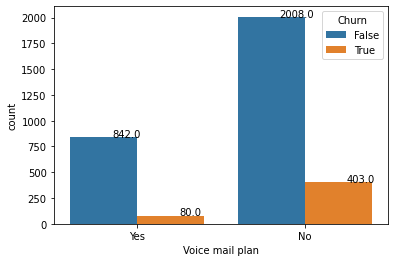

In [17]:
#plottting a countplot of Churn according to Voicemail plan
ax= sns.countplot(x='Voice mail plan',hue='Churn',data=df)
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.show()

In [18]:
#Churn rate of customer with Voice mail plan

#Churn rate = number of Churned customer / total number of customers with voice mail plan
print('Churn rate of customer with Voice mail plan is',80*100/922)

Churn rate of customer with Voice mail plan is 8.676789587852495


In [19]:
#Churn rate of customer without Voice mail plan

#Churn rate = number of Churned customer / total number of customers with voice mail plan
print('Churn rate of customer without Voice mail plan is',403*100/2411)

Churn rate of customer without Voice mail plan is 16.715055993363748





*   Voice mail plan seems to be popular with the customers.
*   Churn rate of Customers with Voice mail plan is about 8%.
*   While Churn rate of Customers who don't have voice mail plan is about 16%







### Area Wise Churn Analysis

In [20]:
#Value counts of column 'Area code'
df['Area code'].value_counts()

415    1655
510     840
408     838
Name: Area code, dtype: int64

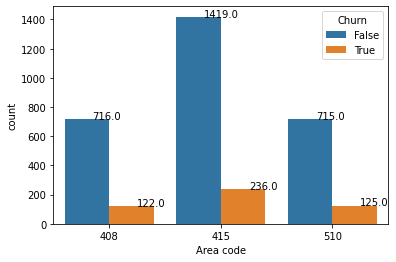

In [21]:
#Plotting a countplot showing Area Wise Churn Analysis
ax = sns.countplot(x='Area code',hue='Churn',data=df)
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.show()



*   Most of the churned customers are from 415 area.
*   While Area codes 408 and 510 had comparatively less churned customers.



## Churn according to International Plan

In [22]:
#Value counts of International plan column
df['International plan'].value_counts()

No     3010
Yes     323
Name: International plan, dtype: int64

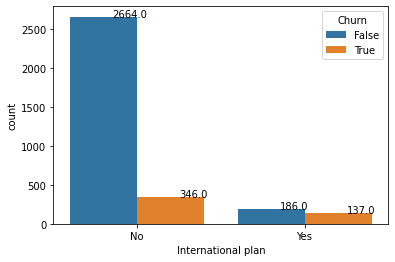

In [23]:
#Plotting a countplot showing Churn according to International plan
ax = sns.countplot(x = 'International plan', hue = 'Churn', data = df)
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.show()

In [24]:
#Churn percentage of customers who dont have International plan
print('Churn percentage of customers who dont have International plan is',346*100/3010)

Churn percentage of customers who dont have International plan is 11.49501661129568


In [25]:
#Churn percentage of customers who  have International plan.
print('Churn percentage of customers who  have International plan is',137*100/323)

Churn percentage of customers who  have International plan is 42.414860681114554




*   Churn rate is more with customer using international plan.
*   Customers with International plan have about 42% Churn rate.
*   While customers who don't have International plan have about 11% Churn rate.
*   It is possible that the international plans might not be attractive for customers.
*   Service of International calls might be very poor which is forcing customers to leave.




